#Data preprocessing

In [371]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [372]:
#Read the data
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Every single feature is categorical

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


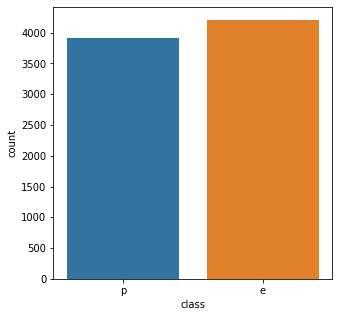

In [374]:
plt.figure(figsize=(5,5))
sns.countplot(data['class'])

In [375]:
#Identifying classes in features
for col in data.columns:
  print(col, " : ", data[col].unique())

#Taking out dependant variable
Y = data.iloc[:, 0].values
data.drop(["class"], axis = 1, inplace = True)

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [376]:
#Dummy variable
sig_cat_col = data.columns

dummies = pd.get_dummies(data[sig_cat_col], drop_first = True)
dummies.shape

#Add the results to the original dataframe
data = pd.concat([data, dummies], axis = 1)

# Drop the original cat variables as dummies are already created
data.drop( sig_cat_col, axis = 1, inplace = True)
data.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   uint8
 1   cap-shape_f                 8124 non-null   uint8
 2   cap-shape_k                 8124 non-null   uint8
 3   cap-shape_s                 8124 non-null   uint8
 4   cap-shape_x                 8124 non-null   uint8
 5   cap-surface_g               8124 non-null   uint8
 6   cap-surface_s               8124 non-null   uint8
 7   cap-surface_y               8124 non-null   uint8
 8   cap-color_c                 8124 non-null   uint8
 9   cap-color_e                 8124 non-null   uint8
 10  cap-color_g                 8124 non-null   uint8
 11  cap-color_n                 8124 non-null   uint8
 12  cap-color_p                 8124 non-null   uint8
 13  cap-color_r                 8124 non-null   uint8
 14  cap-colo

In [378]:
#Getting X
X = data.values

print(X.shape)
print(Y.shape)

(8124, 95)
(8124,)


In [379]:
#Encoding Y
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6499, 95) (6499,) (1625, 95) (1625,)


#Neural network - Vishal


Alright now lets build our neural network

In [381]:
def sigmoid(X):
  res = 1 / (1 + np.exp(-X))
  return res

In [382]:
def initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer):
  
  #Weights and biases between input layer and hidden layer 1 
  W1 = np.random.randn(hidden_layer_1, input_layer)
  b1 = np.zeros((hidden_layer_1, 1))

  #Weights and biases between hidden layer 1 and hidden layer 2 
  W2 = np.random.randn(hidden_layer_2, hidden_layer_1)
  b2 = np.zeros((hidden_layer_2, 1))
  
  #Weights and biases between hidden layer 1 and hidden layer 2 
  W3 = np.random.randn(hidden_layer_3, hidden_layer_2)
  b3 = np.zeros((hidden_layer_3, 1))

  #Weights and biases between hidden layer 3 and output layer 
  W4 = np.random.randn(output_layer, hidden_layer_3)
  b4 = np.zeros((output_layer, 1))

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [383]:
def Forward_prop(X, Weights):

  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Forward propagation - We will be using tanh as activation for hidden layer 
  #and sigmoid for output_layer
  Z1 = np.matmul(W1, X) + b1
  A1 = np.tanh(Z1)

  Z2 = np.matmul(W2, A1) + b2
  A2 = np.tanh(Z2)

  Z3 = np.matmul(W3, A2) + b3
  A3 = np.tanh(Z3)
  
  Z4 = np.matmul(W4, A3) + b4
  A4 = sigmoid(Z4) #Our Y_hat or predicted value

  Units = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2, "Z3" : Z3, "A3" : A3, "Z4" : Z4, "A4" : A4}
  return Units

In [384]:
def cost_compute(Units, y, m):

  #Extracting Y_hat from Units
  A4 = Units["A4"]

  #The cost function is the same as the one we used for logistic regression
  J = (np.sum((-y * np.log(A4)) - ((1 - y) * (np.log(1 - A4)))) / m)

  return J

In [385]:
def Back_prop(Weights, Units, X, Y):

  #Extracting Weights
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  #Extracting units
  A1 = Units["A1"]
  A2 = Units["A2"]
  A3 = Units["A3"]
  A4 = Units["A4"]

  #Back propagation
  dz4 = A4 - Y
  dw4 = (1/m) * np.matmul(dz4, A3.T)
  db4 = (1/m) * np.sum(dz4, axis = 1, keepdims = True)

  dz3 = np.multiply(np.matmul(W4.T, dz4), 1 - np.power(A3,2)) # derivative of tanh(Z) = 1-A^2
  dw3 = (1/m) * np.matmul(dz3, A2.T)
  db3 = (1/m) * np.sum(dz3, axis = 1, keepdims = True)
  
  dz2 = np.multiply(np.matmul(W3.T, dz3), 1 - np.power(A2,2))
  dw2 = (1/m) * np.matmul(dz2, A1.T)
  db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)

  dz1 = np.multiply(np.matmul(W2.T, dz2), 1 - np.power(A1,2))
  dw1 = (1/m) * np.matmul(dz1, X.T)
  db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

  Grads = {"dw1" : dw1, "db1" : db1, "dw2" : dw2, "db2" : db2, "dw3" : dw3, "db3" : db3, "dw4" : dw4, "db4" : db4}
  return Grads

In [386]:
def Update_Weights(Weights, Grads, alpha):
  
  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Extracting grads
  dw1 = Grads["dw1"]
  dw2 = Grads["dw2"]
  dw3 = Grads["dw3"]
  dw4 = Grads["dw4"]

  db1 = Grads["db1"]
  db2 = Grads["db2"]
  db3 = Grads["db3"]
  db4 = Grads["db4"]

  #Updating weights and biases
  W1 = W1 - alpha * dw1
  W2 = W2 - alpha * dw2
  W3 = W3 - alpha * dw3
  W4 = W4 - alpha * dw4

  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  b3 = b3 - alpha * db3
  b4 = b4 - alpha * db4

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [387]:
#Inversion
X_train = X_train.reshape(X_train.shape[0], -1).T
y_train = y_train.reshape(len(y_train), 1).T
X_test = X_test.reshape(X_test.shape[0], -1).T
y_test = y_test.reshape(len(y_test), 1).T

print("X-train :", X_train.shape, "Y-train: ",y_train.shape)
print("X-test :", X_test.shape, "Y-test: ",y_test.shape)

X-train : (95, 6499) Y-train:  (1, 6499)
X-test : (95, 1625) Y-test:  (1, 1625)


Cost after Iter : 0 Cost : 1.9043071468783048
Cost after Iter : 250 Cost : 0.348882812176271
Cost after Iter : 500 Cost : 0.22191367850496446
Cost after Iter : 750 Cost : 0.16711629912981785
Cost after Iter : 1000 Cost : 0.13265467330545766
Cost after Iter : 1250 Cost : 0.11034987514577053
Cost after Iter : 1500 Cost : 0.09412857699101597
Cost after Iter : 1750 Cost : 0.08023048832077628
Cost after Iter : 2000 Cost : 0.0689799175237766
Cost after Iter : 2250 Cost : 0.060701098971977105
Cost after Iter : 2500 Cost : 0.05420946569567591
Cost after Iter : 2750 Cost : 0.049027628469807454
Cost after Iter : 3000 Cost : 0.04483490710475595
Cost after Iter : 3250 Cost : 0.041219212121958226
Cost after Iter : 3500 Cost : 0.03795476803203974
Cost after Iter : 3750 Cost : 0.03506247797617023
Cost after Iter : 4000 Cost : 0.03245371768013248
Cost after Iter : 4250 Cost : 0.030027213645908307
Cost after Iter : 4500 Cost : 0.027823229449930396
Cost after Iter : 4750 Cost : 0.025865488508284726
Cost

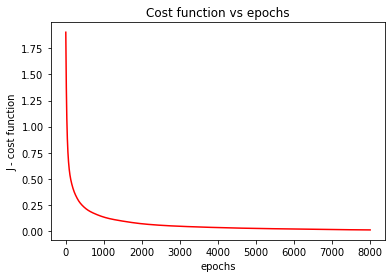

In [388]:
# ANN implementation
input_layer = X_train.shape[0]
hidden_layer_1 = 25
hidden_layer_2 = 15
hidden_layer_3 = 15
output_layer = y_train.shape[0]

epochs = 8000
m = X_train.shape[1]
alpha = 0.03

#Dictionary containing the weights of the different layers
Weights = initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer)

#Storing cost history for plotting purposes
J_hist = []

#Gradient descent
for i in range(epochs):
  Units = Forward_prop(X_train, Weights)

  J = cost_compute(Units, y_train, m)
  J_hist.append(J)

  Grads = Back_prop(Weights, Units, X_train, y_train)  

  Weights = Update_Weights(Weights, Grads, alpha)
  if i % 250 == 0:
    print("Cost after Iter :", i, "Cost :", J)

#Plotting cost vs epochs
plt.plot(range(epochs), J_hist, color = 'red')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

In [389]:
#Train set
#Calling forward propagation and getting y_pred
finalUnits = Forward_prop(X_train, Weights)
y_pred = finalUnits["A4"]
y_pred = y_pred.T

Y_pred = list()
for x in y_pred:
  if x >= 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)  

Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape(1, Y_pred.shape[0])

#Accuracy
score = np.sum(y_train == Y_pred) / y_train.shape[1] * 100

print("Accuracy :", score)

Accuracy : 99.79996922603478


In [390]:
#Test set
#Calling forward propagation and getting y_pred
finalUnits = Forward_prop(X_test, Weights)
y_pred = finalUnits["A4"]
y_pred = y_pred.T

Y_pred = list()
for x in y_pred:
  if x >= 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)  

Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape(1, Y_pred.shape[0])

#Accuracy
score = np.sum(y_test == Y_pred) / y_test.shape[1] * 100

print("Accuracy :", score)

Accuracy : 99.32307692307693


In [391]:
from sklearn.metrics import classification_report,confusion_matrix
y_test = y_test.T
Y_pred = Y_pred.T
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       852
           1       0.99      0.99      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

[[847   5]
 [  6 767]]
